In [22]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
tf.__version__

'2.17.1'

In [8]:
keras.__version__

'3.5.0'

In [9]:
data=pd.read_csv('wine.csv')

In [10]:
data.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Q3. Check for null values, identify categorical variables, and encode them.

In [11]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [12]:
data.select_dtypes(include=['object']).columns.to_list()

['quality']

In [13]:
encoded_data=pd.get_dummies(data,columns=['quality'],drop_first=True)

Q4. Separate the features and target variables from the dataset.

In [14]:
encoded_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False


In [15]:
X=encoded_data.drop(['quality_good'],axis=1)
y=encoded_data['quality_good']

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [16]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print("Training set features (X_train):", X_train.shape)
print("Training set target (y_train):", y_train.shape)
print("Temporary set features (X_temp):", X_temp.shape)
print("Temporary set target (y_temp):", y_temp.shape)

Training set features (X_train): (1279, 11)
Training set target (y_train): (1279,)
Temporary set features (X_temp): (320, 11)
Temporary set target (y_temp): (320,)


In [18]:
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

In [19]:
print("\nValidation set features (X_val):", X_val.shape)
print("Validation set target (y_val):", y_val.shape)
print("Test set features (X_test):", X_test.shape)
print("Test set target (y_test):", y_test.shape)


Validation set features (X_val): (160, 11)
Validation set target (y_val): (160,)
Test set features (X_test): (160, 11)
Test set target (y_test): (160,)


Q6. Scale the dataset using an appropriate scaling technique.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

#fit the  scaler on the training set and transform it
X_train_scaed=scaler.fit_transform(X_train)

# transform the validation and test sets using the same scaler
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)


Q7. Design and implement at least two hidden layers and an output layer for the binary categorical
variables.

In [23]:
# Initialize the neural network
model=Sequential()

# Input layer and first hidden layer
model.add(Dense(64,input_dim=X_train_scaed.shape[1],activation='relu'))
# Second hidden layer
model.add(Dense(32,activation='relu'))

# Output layer for binary classification
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Train the model

history=model.fit(X_train_scaed,y_train,
                  validation_data=(X_val_scaled,y_val),
                  epochs=20,# Number of training epochs
                  batch_size=32, # Number of samples per batch
                  verbose=1)# Print training progress

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7356 - loss: 0.5247 - val_accuracy: 0.7125 - val_loss: 0.5448
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 0.5159 - val_accuracy: 0.6812 - val_loss: 0.5444
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7809 - loss: 0.4723 - val_accuracy: 0.7188 - val_loss: 0.5404
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7577 - loss: 0.5039 - val_accuracy: 0.7250 - val_loss: 0.5340
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7851 - loss: 0.4621 - val_accuracy: 0.7188 - val_loss: 0.5343
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7769 - loss: 0.4669 - val_accuracy: 0.7188 - val_loss: 0.5325
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7751 - loss: 0.4710 - val_accuracy: 0.7250 - val_loss: 0.5303
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7777 - loss: 0.4662 - val_accuracy: 0.7312 - val_loss:

In [29]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7964 - loss: 0.4451 
Test Loss: 0.4442
Test Accuracy: 0.7875


Q9. Print the summary of the model architecture.

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.


Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [32]:
history=model.fit(X_train_scaed,y_train,
                  validation_data=(X_val_scaled,y_val),
                  epochs=20,# Number of training epochs
                  batch_size=32, # Number of samples per batch
                  verbose=1)# Print training progress

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8218 - loss: 0.4147 - val_accuracy: 0.7375 - val_loss: 0.5340
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7815 - loss: 0.4419 - val_accuracy: 0.7375 - val_loss: 0.5396
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8021 - loss: 0.4336 - val_accuracy: 0.7437 - val_loss: 0.5314
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8149 - loss: 0.4133 - val_accuracy: 0.7375 - val_loss: 0.5327
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8325 - loss: 0.3885 - val_accuracy: 0.7500 - val_loss: 0.5290
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7986 - loss: 0.4245 - val_accuracy: 0.7437 - val_loss: 0.5307
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.3852 - val_accuracy: 0.7312 - val_loss: 0.5349
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.4209 - val_accuracy: 0.7437 - val_loss

Q13. Obtain the model's parameters (weights and biases).

In [33]:
weights_and_biases=model.get_weights()

In [35]:
print(f"Total number of parameter arrays: {len(weights_and_biases)}")

Total number of parameter arrays: 6


In [39]:
# Inspect weights and biases layer by layer
for i,layer_weights in enumerate(weights_and_biases):
  #print(layer_weights)
  print(f"\nLayer {i // 2 + 1} - {'Weights' if i % 2 == 0 else 'Biases'}:")
  print(layer_weights)


Layer 1 - Weights:
[[ 1.81337327e-01 -6.37803003e-02 -1.64402246e-01 -1.68334574e-01
   6.75637648e-02  8.74088705e-02  1.04693048e-01 -1.48256510e-01
   3.14413041e-01  1.75326034e-01 -1.67921409e-01  3.19419116e-01
   2.83312500e-01  2.65329510e-01  1.33047253e-01 -3.18941742e-01
   6.60747290e-02 -2.74913106e-02 -4.36143160e-01 -3.26495618e-01
   7.32227862e-02 -1.75704341e-02 -1.06589854e-01 -1.30118132e-01
  -1.44693255e-01 -2.49925423e-02 -3.35205942e-01 -8.05315599e-02
  -2.21238717e-01  4.57736671e-01  3.49057972e-01 -2.33886331e-01
   1.04876868e-01  5.57961911e-02  2.83382297e-01  1.49803400e-01
  -3.36785540e-02 -3.30323696e-01 -2.69580781e-01 -1.38434574e-01
   4.00557786e-01  1.62527394e-02  2.90925354e-01  1.07949190e-01
  -8.03617537e-02 -6.05087802e-02 -6.99571297e-02 -1.23325326e-01
   2.09336299e-02 -3.88321459e-01  1.21453516e-02  5.45811057e-02
   3.10762614e-01  4.76716571e-02  2.19621226e-01  1.43462673e-01
   1.16067991e-01 -3.98062319e-02  1.40413195e-01  1.981

In [40]:
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer {layer.name}:")
    print(f"  Weights shape: {weights[0].shape}")
    print(f"  Biases shape: {weights[1].shape}")

Layer dense:
  Weights shape: (11, 64)
  Biases shape: (64,)
Layer dense_1:
  Weights shape: (64, 32)
  Biases shape: (32,)
Layer dense_2:
  Weights shape: (32, 1)
  Biases shape: (1,)


Q14. Store the model's training history as a Pandas DataFrame.

In [41]:
history_df=pd.DataFrame(history.history)


In [42]:
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.807662,0.431785,0.73750,0.534034
1,0.805317,0.427865,0.73750,0.539642
2,0.813135,0.424470,0.74375,0.531422
3,0.804535,0.422992,0.73750,0.532732
4,0.808444,0.422641,0.75000,0.529046
5,0.810008,0.415348,0.74375,0.530664
6,0.804535,0.413481,0.73125,0.534901
7,0.813917,0.411970,0.74375,0.526734
8,0.809226,0.407176,0.73750,0.528358
9,0.819390,0.405772,0.74375,0.527511


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

In [43]:
import matplotlib.pyplot as plt

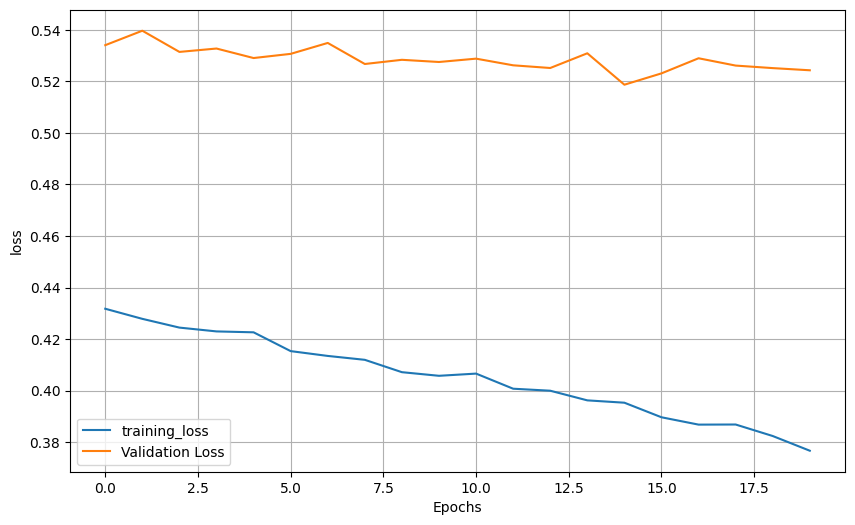

In [47]:
# Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

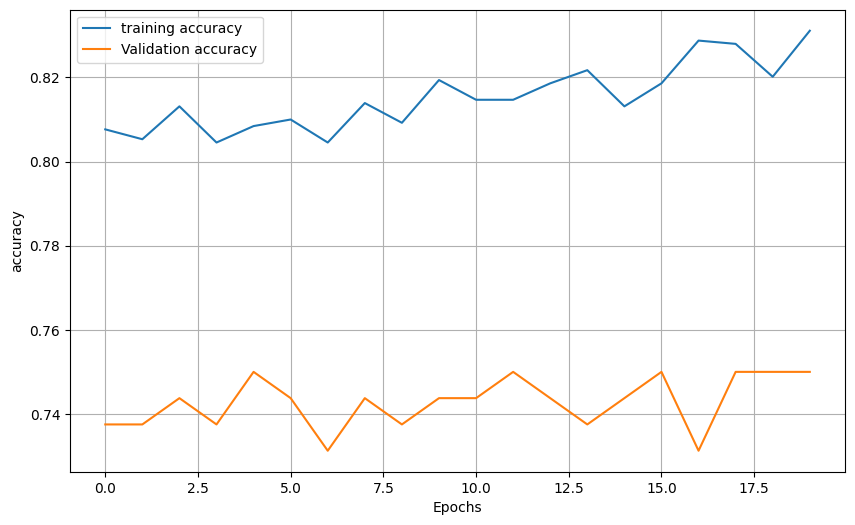

In [48]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [49]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7993 - loss: 0.4276 
Test Loss: 0.4223
Test Accuracy: 0.7937


In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
# Predict classes on the test set
y_pred_prob=model.predict(X_test_scaled)
y_pred=(y_pred_prob>0.5).astype(int)

# Generate a classification report

print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

     Class 0       0.76      0.79      0.78        72
     Class 1       0.82      0.80      0.81        88

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[57 15]
 [18 70]]
